In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("First output.csv")

In [3]:
data["score"] = pd.to_numeric(data["score"], errors="coerce")

In [4]:
data = data.dropna()

In [5]:
data.loc[:, "Case"] = data["score"].transform(lambda x: "Positive" if x >= 4 else "Negative") 

In [6]:
data["Case"].value_counts()

Case
Positive    814
Negative     49
Name: count, dtype: int64

<Axes: xlabel='Case'>

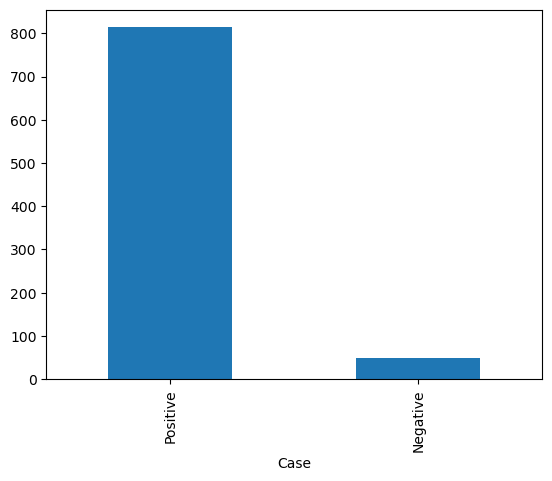

In [7]:
data["Case"].value_counts().plot(kind="bar")

In [8]:
data["score"].value_counts()

score
5.0    327
4.0    322
4.5    165
1.0     21
0.5     16
2.0     10
1.5      2
Name: count, dtype: int64

In [9]:
data[data["Case"] == "Negative"]

,entry_id,offer_ref,review_text,score,Case
0,14633464,103592649,Ten sam projektor ale z innym logo widziałem o...,1.0,Negative
1,15234194,100038918,Nie wiem kto pisze te wszystkie opinie ale ten...,1.5,Negative
2,13151780,96703997,Słaby. Parametry podane w danych technicznych ...,1.0,Negative
20,17607160,146778223,Nie dostałem produktu,0.5,Negative
34,17607158,128004375,Nie dostałem produktu,0.5,Negative
44,17716940,140558095,Kamera nie spełniła moich oczekiwań. Wykrywani...,2.0,Negative
51,17323092,118174705,Już trzy tygodnie czekam na pieniądze za zwróc...,0.5,Negative
74,16818026,98447371,zz,0.5,Negative
78,15538951,32233021,efef,1.0,Negative
85,15917212,49753246,Ta szklarnia to beznadziejny produkt. Wykonana...,1.0,Negative


In [10]:
data_fixed = pd.read_csv("./second output.csv")

In [11]:
data_fixed["score"] = pd.to_numeric(data_fixed["score"], errors="coerce")
data_fixed = data_fixed.dropna()

In [12]:
data_fixed["Positive"] = data_fixed["score"] >= 4

In [13]:
data_fixed["Positive"].value_counts()

Positive
True     1161
False     241
Name: count, dtype: int64

<Axes: xlabel='Positive'>

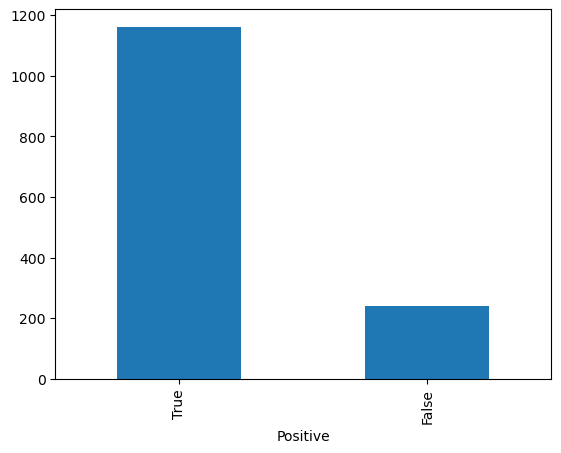

In [14]:
data_fixed["Positive"].value_counts().plot(kind="bar")

In [15]:
data_with_limits = pd.read_csv("./supplement.csv")

In [29]:
data_with_limits2 = pd.read_csv("./ceneoscrape/spiders/output.csv")

In [31]:
data_with_limits = pd.concat([data_with_limits, data_with_limits2])

In [32]:
different_runs_delimiters = data_with_limits[data_with_limits["entry_date"] == "entry_date"].index.values

In [33]:
data_with_limits["score"] = pd.to_numeric(data_with_limits["score"], errors="coerce")
data_with_limits = data_with_limits.dropna(subset=["score"])

In [34]:
data_with_limits = data_with_limits.drop_duplicates(subset=["entry_id", "offer_ref"])

In [35]:
data_with_limits["Positive"] = data_with_limits["score"] >= 4

In [36]:
data_with_limits["Positive"].value_counts()

Positive
True     45960
False    44459
Name: count, dtype: int64

In [37]:
data_with_limits["Rating"] = data_with_limits["score"].transform(lambda x: "Positive" if x >= 4 else ("Negative" if x <= 2 else "Medium"))

In [38]:
data_with_limits["top_category"].nunique()

487

In [39]:
data_with_limits["offer_ref"].nunique()

9268

In [40]:
data_with_limits[data_with_limits["Rating"] != "Medium"]

,entry_date,entry_id,full_category,offer_ref,product_title,purchase_date,review_text,score,top_category,Positive,Rating
0,2021-09-07 10:21:59,14929291,Księgarnia/Książki/Podręczniki akademickie/Nau...,100386482,Zneutralizuj chemie z pożywienia i odzyskaj zd...,2021-08-28 08:28:48,"zamówione, opłacone - niedostarczone.",1.0,Nauki humanistyczne i społeczne,False,Negative
1,2020-04-03 22:37:55,12063810,Zdrowie/Leki bez recepty/Przeziębienie i grypa,10029197,Amol płyn 250 ml,2020-03-22 16:03:31,kontakt telefoniczny jak i majlowy praktycznie...,0.5,Przeziębienie i grypa,False,Negative
2,2020-04-03 22:37:55,14346948,Zdrowie/Leki bez recepty/Przeziębienie i grypa,10029197,Amol płyn 250 ml,2020-03-22 16:03:31,nie otrzymałem jeszcze towaru,0.5,Przeziębienie i grypa,False,Negative
3,2020-04-03 22:37:55,18209531,Zdrowie/Leki bez recepty/Przeziębienie i grypa,10029197,Amol płyn 250 ml,2020-03-22 16:03:31,xxxxxxxx,0.5,Przeziębienie i grypa,False,Negative
4,2020-04-03 22:37:55,7761116,Zdrowie/Leki bez recepty/Przeziębienie i grypa,10029197,Amol płyn 250 ml,2020-03-22 16:03:31,drogo,0.5,Przeziębienie i grypa,False,Negative
...,...,...,...,...,...,...,...,...,...,...,...
81180,2011-12-06 12:30:09,2272738,Hobby i zwierzęta/Karmy i akcesoria dla kotów/...,88619028,JosiCat Classic Sterilised 18Kg,2013-02-15 07:42:12,"Karma bardzo chętnie jedzona przez koty, produ...",5.0,Suche,True,Positive
81181,2011-12-06 12:30:09,2341448,Hobby i zwierzęta/Karmy i akcesoria dla kotów/...,88619028,JosiCat Classic Sterilised 18Kg,2013-02-15 07:42:12,ok,5.0,Suche,True,Positive
81182,2011-12-06 12:30:09,2402655,Hobby i zwierzęta/Karmy i akcesoria dla kotów/...,88619028,JosiCat Classic Sterilised 18Kg,2013-02-15 07:42:12,Za tą cenę karma jest rewelacyjna,5.0,Suche,True,Positive
81183,2011-12-06 12:30:09,2450131,Hobby i zwierzęta/Karmy i akcesoria dla kotów/...,88619028,JosiCat Classic Sterilised 18Kg,2013-02-15 07:42:12,"Karma, którą moja kotka zjada ze smakiem, a je...",5.0,Suche,True,Positive


<Axes: xlabel='Rating'>

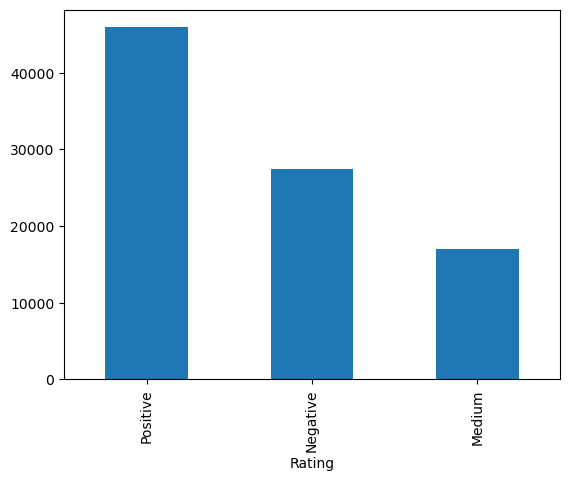

In [41]:
data_with_limits["Rating"].value_counts().plot(kind="bar")

In [42]:
data_with_limits["top_category"].value_counts().iloc[:50]

top_category
Perfumy i wody damskie                   5186
Perfumy i wody męskie                    3394
Nutrikosmetyki i leki dermatologiczne    2921
Smartfony                                2493
Suche                                    2133
Przeziębienie i grypa                    1985
Ekspresy ciśnieniowe                     1947
Układ moczowy i płciowy                  1907
Preparaty medycyny naturalnej            1540
Dokanałowe                               1452
Soczewki kontaktowe                      1438
Farby                                    1383
Szampony do włosów                       1369
Podkłady w kremie                        1293
Układ pokarmowy                          1176
Nauszne                                  1127
Twarz                                    1115
Odkurzacze pionowe                       1031
4K UHD                                   1023
Klasyczne telefony komórkowe             1011
Odkurzacze tradycyjne                     984
Akcja                

In [43]:
data_with_limits["review_text"] = data_with_limits["review_text"].str.lower()

In [44]:
print(data_with_limits["Rating"].value_counts())
print("Total Reviews Scraped:", len(data_with_limits["review_text"]), "\n")
print(data_with_limits.drop_duplicates(["review_text", "Rating"])["Rating"].value_counts())
print("Uniquely Phrased Reviews Scraped: ", len(data_with_limits.drop_duplicates("review_text")["review_text"]), "\n")


Rating
Positive    45960
Negative    27396
Medium      17063
Name: count, dtype: int64
Total Reviews Scraped: 90419 

Rating
Positive    27350
Negative    24026
Medium      13376
Name: count, dtype: int64
Uniquely Phrased Reviews Scraped:  63992 



<Axes: xlabel='top_category'>

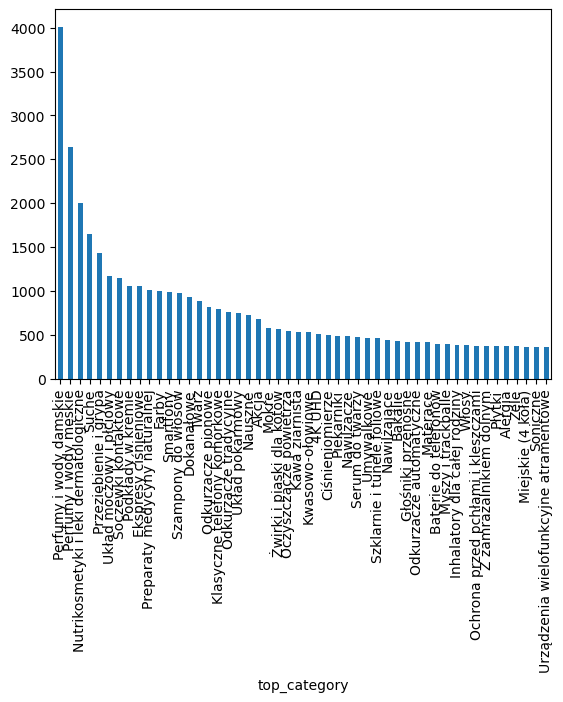

In [48]:
data_with_limits.drop_duplicates("review_text")["top_category"].value_counts().iloc[:50].plot(kind="bar")